## Steps to build the Loan Eligibility model

1. Loading the dataset
2. Pre-processing the dataset
3. Building the Loan Prediction model

## 1. Loading the dataset

In [1]:
# importing libraries
import pandas as pd

# loading the dataset
train = pd.read_csv('loan_data.csv')
train.head()

,Gender,Married,ApplicantIncome,LoanAmount,Loan_Status
0,Male,Yes,4583,128000.0,N
1,Male,Yes,3000,66000.0,Y
2,Male,Yes,2583,120000.0,Y
3,Male,No,6000,141000.0,Y
4,Male,Yes,5417,267000.0,Y


<ipython-input-4-2ee999bc33c7>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(train, x='ApplicantIncome', y='Gender', inner='box', palette='Dark2')


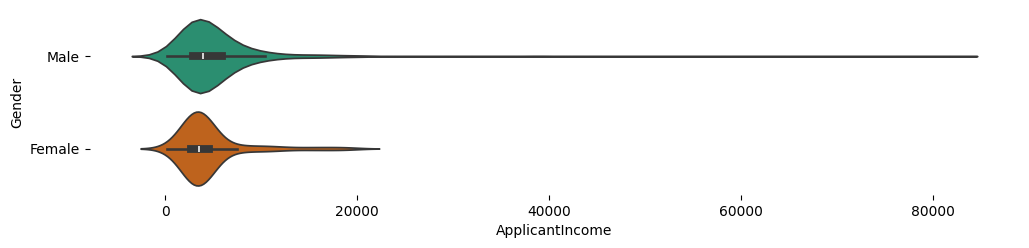

In [4]:
# @title Gender vs ApplicantIncome

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(train['Gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(train, x='ApplicantIncome', y='Gender', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

## 2. Pre-processing the dataset

In [5]:
# converting categories into numbers
train['Gender']= train['Gender'].map({'Male':0, 'Female':1})
train['Married']= train['Married'].map({'No':0, 'Yes':1})
train['Loan_Status']= train['Loan_Status'].map({'N':0, 'Y':1})

In [6]:
# separating dependent and independent variables
X = train[['Gender', 'Married', 'ApplicantIncome', 'LoanAmount']]
y = train.Loan_Status

## 3. Building the Loan Prediction model

In [7]:
# importing machine learning model
from sklearn.linear_model import LogisticRegression

In [8]:
# training the logistic regression model
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

In [9]:
# saving the model
import pickle
pickle_out = open("classifier.pkl", mode = "wb")
pickle.dump(model, pickle_out)
pickle_out.close()

## Deploying the machine learning model using streamlit

1. Building the Frontend of the application
2. Loading and Pre-processing the data
3. Building the Machine Learning model to automate Loan Eligibility
4. Deploying the application

## 1. Building the Frontend of the application

1.1 Install Required Libraries<br>
1.2 Creating the Frontend of the app using Streamlit

### 1.1 Install Required Libraries##

In [10]:
# installing pyngrok
!pip install -q pyngrok

In [11]:
# installing streamlit
!pip install -q streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 53.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 58.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.8 MB/s eta 0:00:00


### 1.2. Creating the frontend of the app using streamlit

In [12]:
# creating the script
%%writefile app.py

# importing required libraries
import pickle
import streamlit as st

# loading the trained model
pickle_in = open('classifier.pkl', 'rb')
classifier = pickle.load(pickle_in)

# this is the main function in which we define our app
def main():
    # header of the page
    html_temp = """
    <div style ="background-color:yellow;padding:13px">
    <h1 style ="color:black;text-align:center;">Check your Loan Eligibility</h1>
    </div>
    """
    st.markdown(html_temp, unsafe_allow_html = True)

    # following lines create boxes in which user can enter data required to make prediction
    Gender = st.selectbox('Gender',("Male","Female","Other"))
    Married = st.selectbox('Marital Status',("Unmarried","Married","Other"))
    ApplicantIncome = st.number_input("Monthly Income in Rupees")
    LoanAmount = st.number_input("Loan Amount in Rupees")
    result =""

    # when 'Check' is clicked, make the prediction and store it
    if st.button("Check"):
        result = prediction(Gender, Married, ApplicantIncome, LoanAmount)
        st.success('Your loan is {}'.format(result))

# defining the function which will make the prediction using the data which the user inputs
def prediction(Gender, Married, ApplicantIncome, LoanAmount):

    # 2. Loading and Pre-processing the data

    if Gender == "Male":
        Gender = 0
    else:
        Gender = 1

    if Married == "Married":
        Married = 1
    else:
        Married = 0

    # 3. Building the model to automate Loan Eligibility

    # if (ApplicantIncome >= 50000):
    #     loan_status = 'Approved'
    # elif (LoanAmount < 500000):
    #     loan_status = 'Approved'
    # else:
    #     loan_status = 'Rejected'
    # return loan_status

    prediction = classifier.predict(
        [[Gender, Married, ApplicantIncome, LoanAmount]])

    if prediction == 0:
        pred = 'Rejected'
    else:
        pred = 'Approved'
    return pred

if __name__=='__main__':
    main()

Writing app.py


## 4. Deploying the application

In [13]:
# running the app
!streamlit run app.py &>/dev/null&

In [20]:
# making the locally-hosted web application to be publicly accessible
from pyngrok import ngrok
#Make sure the function call is not indented
ngrok.set_auth_token("pyngrok")

public_url = ngrok.connect('8501')
public_url

<NgrokTunnel: "https://f8e4-34-125-47-110.ngrok-free.app" -> "http://localhost:8501">